Fashion MNIST experiment

## Loading the packages

In [52]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import fashion_mnist
from keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input
from sklearn import metrics as me
from scipy import stats

%matplotlib inline


Note: you may need to restart the kernel to use updated packages.


In [53]:
def build_grid_of_images(array):
    assert len(array.shape) == 3
    dim_0 = np.sqrt(array.shape[0])
    assert dim_0.is_integer()
    
    temp_out = np.reshape(array, (dim_0, dim_0, array.shape[1], array.shape[2]))
    temp_out = np.rollaxis(temp_out, 1, 3)
    return np.reshape(temp_out, (dim_0*array.shape[1], dim_0*array.shape[2]))

def plot_conv_layer_output(temp_out, title):
    temp_to_plot = build_grid_of_images(temp_out)
    pl.imshow(temp_to_plot, interpolation='nearest', cmap=pl.get_cmap('Greys'))
    ax = pl.gca()
    ax.set_xticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[1]))    
    ax.set_yticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[2]))
    pl.grid()
    pl.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')
    pl.title(title)

def plot_dense_layer_output(temp_out, title):
    pl.bar(np.arange(temp_out.shape[1])-0.4, temp_out[0,:])
    pl.xlim(-0.5, temp_out.shape[1])
    pl.grid()
    pl.title(title)

In [54]:
#load the mnist dataset and normalize in the range[0,1]
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
X_test = X_test.reshape(n_test, height, width, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

n_classes = 10

print(n_train, 'train samples')
print(n_test, 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Train: X=(60000, 28, 28, 1), y=(60000, 10)
Test: X=(10000, 28, 28, 1), y=(10000, 10)


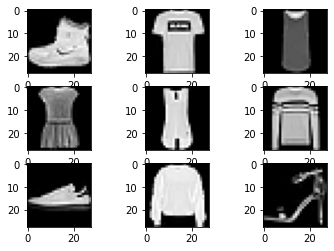

In [55]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pl.subplot(330 + 1 + i)
	# plot raw pixel data
	pl.imshow(X_train[i], cmap=pl.get_cmap('gray'))
# show the figure
pl.show()

In [62]:
def measure_model_perf(model, X_test, Y_test, history, title):
    score = model.evaluate(X_test, Y_test, verbose=1)
    pl.clf()
    pl.plot(history.history['loss'], label='Training')
    pl.plot(history.history['val_loss'], label='Testing')
    pl.ylabel('loss')
    pl.xlabel('Number of epochs')
    pl.title(title + ' Test accuracy: ' + str(round(score[1] * 100, 2)) + '%')
    pl.legend()
    pl.grid()
    pl.savefig('../outPutFashion/' + title + '.png', dpi=500)



Epoch 1/10
469/469 [==============================] - 52s 109ms/step - loss: 0.6781 - accuracy: 0.7552 - val_loss: 1.0493 - val_accuracy: 0.6659
Epoch 2/10
469/469 [==============================] - 51s 108ms/step - loss: 0.4246 - accuracy: 0.8439 - val_loss: 0.3498 - val_accuracy: 0.8711
Epoch 3/10
469/469 [==============================] - 52s 111ms/step - loss: 0.3624 - accuracy: 0.8635 - val_loss: 0.3092 - val_accuracy: 0.8842
Epoch 4/10
469/469 [==============================] - 50s 106ms/step - loss: 0.3308 - accuracy: 0.8776 - val_loss: 0.2804 - val_accuracy: 0.8935
Epoch 5/10
469/469 [==============================] - 50s 107ms/step - loss: 0.3077 - accuracy: 0.8853 - val_loss: 0.2825 - val_accuracy: 0.8918
Epoch 6/10
469/469 [==============================] - 50s 106ms/step - loss: 0.2935 - accuracy: 0.8918 - val_loss: 0.2722 - val_accuracy: 0.8982
Epoch 7/10
469/469 [==============================] - 50s 106ms/step - loss: 0.2820 - accuracy: 0.8943 - val_loss: 0.2731 - val_ac

" \n\nl0 = Input(shape=(height, width, 1), name='l0')\n\nl1 = Conv2D(16, (5, 5), padding='same', activation='relu', name='l1')(l0)\n\nl2 = Conv2D(16, (5, 5), padding='same', activation='relu', name='l2')(l1)\nl2_bn = BatchNormalization(name='l2_bn')(l2)\nl2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2_bn)\nl2_d = Dropout(0.3)(l2_mp)\n\nl3 = Conv2D(32, (5, 5), padding='same', activation='relu', name='l3')(l2_d)\n\nl4 = Conv2D(32, (3, 3), padding='same', activation='relu', name='l4')(l3)\nl4_bn = BatchNormalization(name='l4_bn')(l4)\nl4_mp = MaxPooling2D(pool_size=(2, 2), name='l4_mp')(l4_bn)\nl4_d = Dropout(0.3)(l4_mp)\n\nl5 = Conv2D(64, (5, 5), padding='same', activation='relu', name='l5')(l4_d)\n\n\nl6 = Conv2D(64, (5, 5), padding='same', activation='relu', name='l6')(l5)\nl6_bn = BatchNormalization(name='l6_bn')(l6)\nl6_mp = MaxPooling2D(pool_size=(2, 2), name='l6_mp')(l6_bn)\nl6_d = Dropout(0.3)(l6_mp)\n\n\nflat = Flatten(name='flat')(l6_d)\n\nl7 = Dense(64, activation='relu

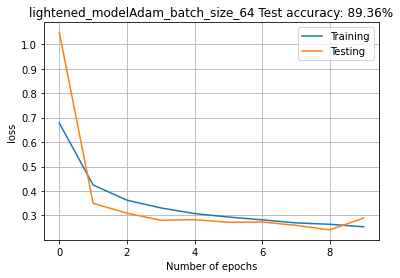

In [68]:
#creat the CNN and show its architecture
''' l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

l2 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l2')(l1_mp)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

l3 = Conv2D(16, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)

flat = Flatten(name='flat')(l3_mp)

l4 = Dense(25, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)
model.summary()
'''
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization
l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(32, (3, 3), padding='same', activation='relu', name='l1')(l0)
l1_bn = BatchNormalization(name='l1_bn')(l1)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1_bn)
l1_d = Dropout(0.3)(l1_mp)

l2 = Conv2D(64, (3, 3), padding='same', activation='relu', name='l2')(l1_d)
l2_bn = BatchNormalization(name='l2_bn')(l2)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2_bn)
l2_d = Dropout(0.3)(l2_mp)

l3 = Conv2D(64, (3, 3), padding='same', activation='relu', name='l3')(l2_d)
l3_bn = BatchNormalization(name='l3_bn')(l3)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3_bn)
l3_d = Dropout(0.3)(l3_mp)

flat = Flatten(name='flat')(l3_d)
f_d = Dropout(0.3)(flat)

l4 = Dense(128, activation='relu', name='l4')(f_d)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)

batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

title = 'lightened_modelAdam_batch_size_128'

measure_model_perf(model, X_test, Y_test, history, title)

''' 

l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(16, (5, 5), padding='same', activation='relu', name='l1')(l0)

l2 = Conv2D(16, (5, 5), padding='same', activation='relu', name='l2')(l1)
l2_bn = BatchNormalization(name='l2_bn')(l2)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2_bn)
l2_d = Dropout(0.3)(l2_mp)

l3 = Conv2D(32, (5, 5), padding='same', activation='relu', name='l3')(l2_d)

l4 = Conv2D(32, (3, 3), padding='same', activation='relu', name='l4')(l3)
l4_bn = BatchNormalization(name='l4_bn')(l4)
l4_mp = MaxPooling2D(pool_size=(2, 2), name='l4_mp')(l4_bn)
l4_d = Dropout(0.3)(l4_mp)

l5 = Conv2D(64, (5, 5), padding='same', activation='relu', name='l5')(l4_d)


l6 = Conv2D(64, (5, 5), padding='same', activation='relu', name='l6')(l5)
l6_bn = BatchNormalization(name='l6_bn')(l6)
l6_mp = MaxPooling2D(pool_size=(2, 2), name='l6_mp')(l6_bn)
l6_d = Dropout(0.3)(l6_mp)


flat = Flatten(name='flat')(l6_d)

l7 = Dense(64, activation='relu', name='l7')(flat)

l8 = Dense(n_classes, activation='softmax', name='l8')(l7)

model = Model(inputs=l0, outputs=l8)

batch_size = 64
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

title = 'Test_with_CNNdigit_model_hyper_parameter'

measure_model_perf(model, X_test, Y_test, history, title)
'''


In [59]:
#define some constatns and train the CNN
batch_size = 64
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
 14/469 [..............................] - ETA: 1:29 - loss: 0.1749 - accuracy: 0.9342

KeyboardInterrupt: 

Test score: 0.2221577912569046
Test accuracy: 0.9200999736785889


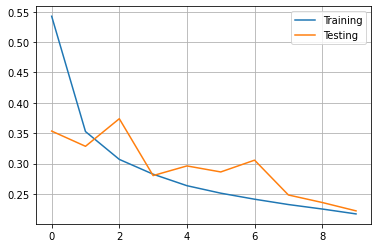

In [65]:
#show the performance
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

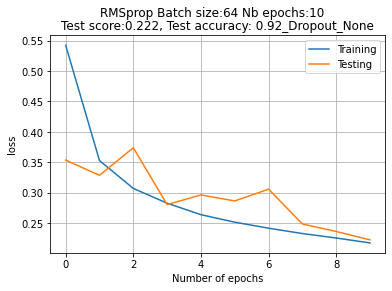

In [66]:
def plot_graph(history, optimName, batch_size, n_epoch, testScore, testAccuracy, drop):
    pl.clf()
    pl.plot(history.history['loss'], label='Training')
    pl.plot(history.history['val_loss'], label='Testing')
    pl.ylabel('loss')
    pl.xlabel('Number of epochs')
    pl.suptitle(optimName+' Batch size:'+str(batch_size)+' Nb epochs:'+str(n_epoch))
    pl.legend()
    pl.title('Test score:' + str(round(testScore,3)) + ', Test accuracy: '  + str(round(testAccuracy,3)) + '_Dropout_'+ ('None' if drop < 0 else str(drop)))
    pl.grid()
    pl.savefig('../outPutCNN/' + optimName+'_Batch_size'+str(batch_size)+' Nb_epochs'+str(n_epoch)+ '_Dropout_'+ ('None' if drop < 0 else str(drop)) + '.png', dpi=500)
    
plot_graph(history,'RMSprop', batch_size, n_epoch,score[0],score[1],-1)

In [ ]:
#confusion matrix
pred = model.predict_on_batch(X_test)
pred = np.argmax(pred, axis=-1)
me.confusion_matrix(y_test, pred)

In [ ]:
# view of the incorrect results
for x in range(500):
    X_tested = X_test[x,:].reshape(28,28,1)
    pred = model.predict(X_tested).argmax()
    real = Y_test[x].argmax()
    if (pred != real):
        pl.title('Prediction: %d real: %d' % (pred, real))
        pl.imshow(X_tested.reshape([28,28]), cmap=pl.get_cmap('Greys'))
        pl.show()